# Segmentation

- 모델명 : yolov8?-seg

## Segmentation 추론결과 조회
- segmentation 추론 결과는 Masks를 이용해 분할된 mask 정보와 Boxes를 이용해 추론한 bounding box의 결과를 조회한다.
- **ultralytics.yolo.engine.results.Masks**
    - Segmentation 의 결과 type
    - Results.masks 로 조회한다.
    - 주요 속성, 메소드
        - shape: [object 개수, height, width]
            - height, width: mask image size
        - data: 결과 Tensor(3차원 배열) 반환. `0: 배경, 1: 물체` 를 원소로 가지는 결과 Tensor를 반환한다.
            - 픽셀별로 물체 인지 아닌 지를 표현하는 tensor를 반환
        - xy : mask의 bounding 좌표(경계선 좌표)를 물체별로 list에 담아서 반환한다.
            - Object의 외곽선을 그리는 좌표들을 반환
            - 개별 object 의 좌표들은 \[point개수, x좌표, y좌표\] shape의 ndarray로 구성된다.
        - xyn: xy의 결과를 이미지 크기 대비 비율로 normalize한 결과.
- **ultralytics.yolo.engine.results.Boxes**
     - Results.boxes로 조회
    - 주요 속성
        - shape: 결과 shape. (찾은 물체개수, 6)
        - boxes
            - 6: 좌상단 x, 좌상단 y, 우하단 x, 우하단 y, confidence score, label
        - xyxy
            - bounding box의 `좌상단 x, 좌상단 y, 우하단 x, 우하단 y` 좌표 반환
        - xyxyn
            - xyxy를 이미지 대비 비율로 반환
        - xywh
            - bounding box의 `center x, center y, 너비, 높이` 를 반환
        - xywhn
            - xywh를 이미지 대비 비율로 반환
        - cls: 찾은 물체의 label
        - conf: cls에 대한 confidence score (그 물체일 확률)
        - boxes
            - `x, y, x, y, conf, cls` tensor를 반환            

In [15]:
## CLI
# !yolo task=segment mode=predict model=models/yolov8n-seg.pth source=image경로 ..
## 코드
from ultralytics import YOLO
model = YOLO("models/yolov8n-seg.pt")
# result = model("02_test_image_seg/beatles.jpg", save=True, conf=0.5, verbose=False)
### 디렉토리 안의 모든 이미지/동영상을 검출
# result = model("02_test_image_seg", save=True, conf=0.5, verbose=False)
result = model(
    ["02_test_image_seg/beatles.jpg", "02_test_image_seg/bus.jpg"],
    save=True, verbose=False)

Results saved to C:\Classes\DA-35\runs\segment\predict7


In [16]:
type(result), len(result)

(list, 2)

In [17]:
type(result[0]) # 개별 이미지 검출 결과: Results
## YOLO segmentation 검출결과: segement + object detection
#segment: Results.masks - Masks
#detect:    Results.boxes  - Boxes

ultralytics.engine.results.Results

In [19]:
# masks: Seg  결과 조회
masks = result[0].masks
print(type(masks))

<class 'ultralytics.engine.results.Masks'>


In [20]:
### mask image shape
masks.shape # [15: 찾은 물체개수, 640:H, 640:W]

torch.Size([15, 640, 640])

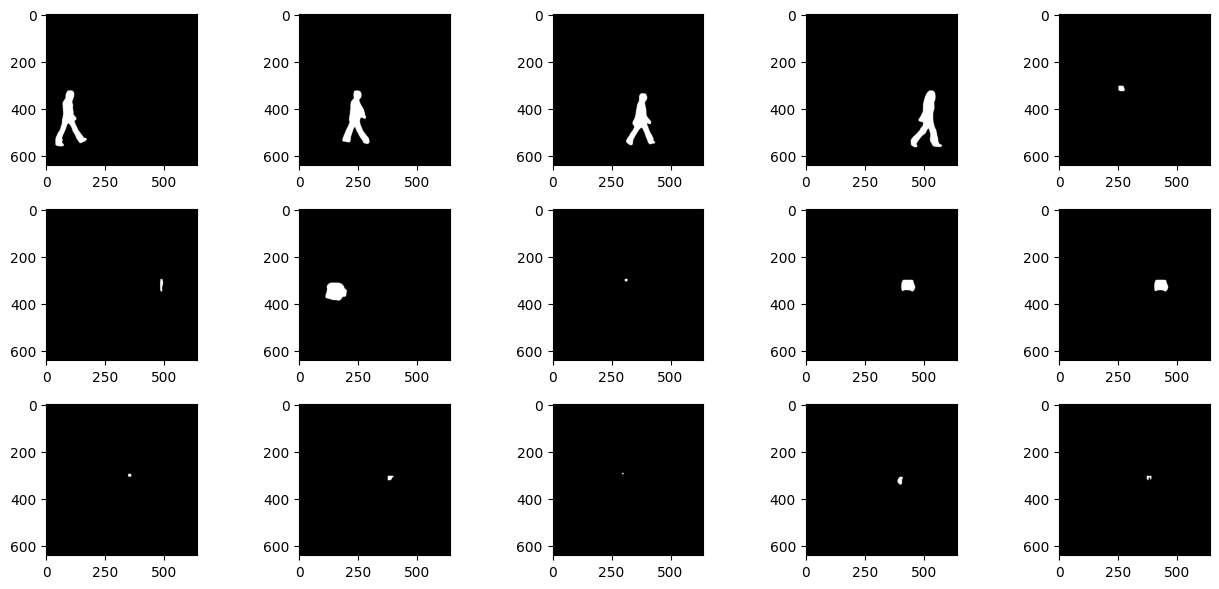

In [26]:
### mask image  조회 - masks.data
import matplotlib.pyplot as plt
plt.figure(figsize=(13, 6))
for idx in range(15):
    plt.subplot(3, 5, idx+1)
    m_img = masks.data[idx]
    plt.imshow(m_img, cmap="gray")

plt.tight_layout()
plt.show()

In [36]:
## 물체 외곽선의 좌표 (poly line)  masks.xy, masks.xyn
xys = masks.xy
print(type(xys), len(xys))  # 찾은 object 별로 좌표들을 묶어서 제공. : list
print(type(xys[0]), xys[0].shape) # 첫번째 object의 외곽선의 좌표들. (364:점의개수, 2:x,y)
### (점의개수, 2)
xys[0][:5]

<class 'list'> 15
<class 'numpy.ndarray'> (364, 2)


array([[      117.5,         405],
       [     116.25,      406.25],
       [        115,      406.25],
       [      112.5,      408.75],
       [      112.5,         410]], dtype=float32)

In [40]:
backgroud_arr.shape

(800, 800)

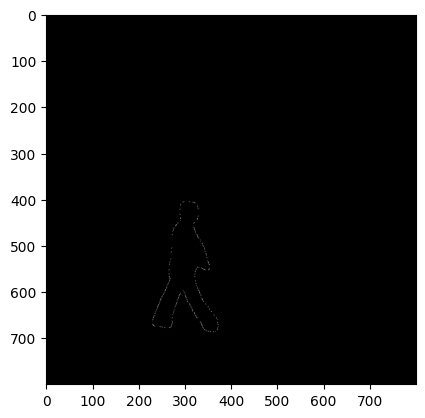

In [50]:
## 외곽선 좌표 그리기
import numpy as np
import matplotlib.pyplot as plt
idx = 1
backgroud_arr = np.zeros(result[0].orig_shape)
x = xys[idx][:, 0].astype("int32")
y = xys[idx][:, 1].astype('int32')
backgroud_arr[y, x] = 1
plt.imshow(backgroud_arr, cmap='gray')
plt.show()

In [3]:
# 동영상 추론
# result2 = model(0, save=True, show=True)


1/1: 0... Success  (inf frames of shape 640x480 at 30.00 FPS)


WARNING  inference results will accumulate in RAM unless `stream=True` is passed, causing potential out-of-memory
errors for large sources or long-running streams and videos. See https://docs.ultralytics.com/modes/predict/ for help.

Example:
    results = model(source=..., stream=True)  # generator of Results objects
    for r in results:
        boxes = r.boxes  # Boxes object for bbox outputs
        masks = r.masks  # Masks object for segment masks outputs
        probs = r.probs  # Class probabilities for classification outputs

0: 480x640 1 person, 93.1ms
0: 480x640 1 person, 58.7ms
0: 480x640 1 person, 57.2ms
0: 480x640 1 person, 62.5ms
0: 480x640 1 person, 61.5ms
0: 480x640 1 person, 55.8ms
0: 480x640 1 person, 56.5ms
0: 480x640 1 person, 60.5ms
0: 480x640 1 person, 62.5ms
0: 480x640 1 person, 1 tv, 60.8ms
0: 480x640 1 person, 1 tv, 57.0ms
0: 480x640 1 person, 57.0ms
0: 480x640 1 person, 1 tv, 56.7ms
0: 480x640 1 

KeyboardInterrupt: 

# custom dataset training

- custom dataset training은 object detection과 동일
- custom dataset: https://universe.roboflow.com/angelo-maglasang-vuuq3/crack_flip_rotate/dataset/1